# Data Visualization in Python
For this workshop we are going to be exploring the basics of **seaborn**, a statistical graphing library for Python. Seaborn is built on top of **matplotlib**, but provides a high level API and aesthetically pleasing graphs. Seaborn uses Pandas dataframes and automatically cleans data. 

### Setup

Install seaborn with `conda install seaborn`

If you are on **Windows**, run that command from the Anaconda Command Prompt

If you are on **Mac OS X**, run that command from the terminal

In [1]:
%matplotlib inline
'''
IPython features "magic functions", which all begin with a percent symbol.
Some other functions include timers and running shell commands
%matplotlib inline tells IPython to display plots in the notebook 
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Comparing matplotlib and seaborn
### With matplotlib

In [2]:
'''
np.linspace will generate 100 evenly spaced numbers from 0 to 14
It is a linearly spaced vector
'''
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

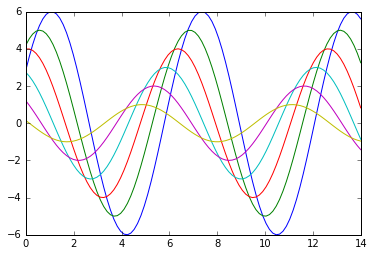

In [3]:
sinplot()

### With seaborn

In [4]:
import seaborn as sns

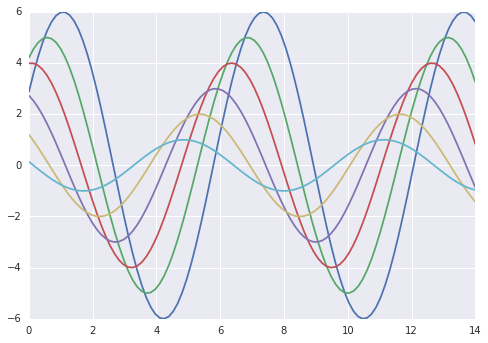

In [5]:
sinplot()

# Basic Plotting
These are just simple plots with random data.

In [6]:
x = np.random.normal(size=100)

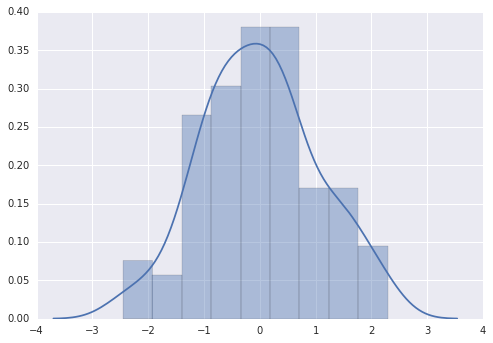

In [7]:
sns.distplot(x)

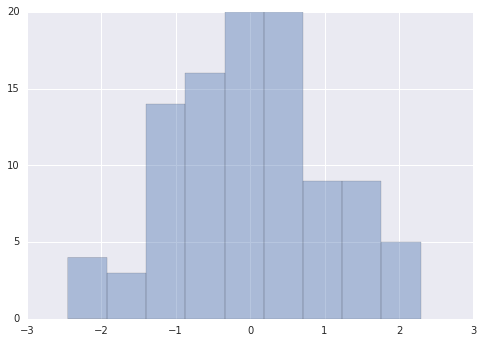

In [8]:
sns.distplot(x, kde=False)

## Other Plots
[Factor plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)
![Factor plot](https://i.imgur.com/ybqZFF3.png)

[Time Series Plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.tsplot.html)
![Time Series Plot](https://i.imgur.com/XFk2TBk.png)

# Linear Regression

In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


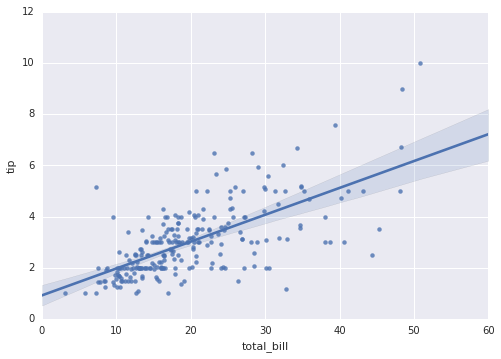

In [11]:
sns.regplot(x="total_bill", y="tip", data=tips)

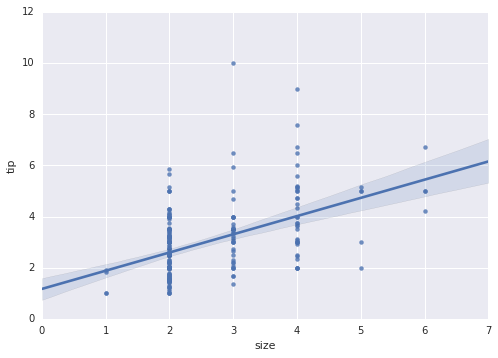

In [12]:
sns.regplot(x="size", y="tip", data=tips)

# Heatmaps

In [13]:
flights = sns.load_dataset("flights")

In [14]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [15]:
flights = flights.pivot("month", "year", "passengers")
# easier to explain pivot
print flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

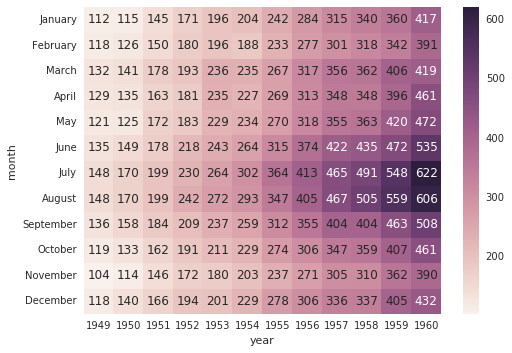

In [16]:
sns.heatmap(flights, annot=True, fmt="d")

# Titanic Dataset

Contains almost 900 rows of passengers from the Titanic. Contains the following features:
- survived - 1 = Survived, 0 = Died
- pclass - First class (1), Second class (2), or Third class (3).
- sex - The gender of the passenger
- age - The age of the passenger
- sibsp - Number of siblings and spouses the passenger had on board.
- parch - Number of parents and children the passenger had on board.
- fare - How much the passenger paid for the ticker.
- embarked - First letter of the city where the passenger boarded the Titanic
- who - Contains either man, woman, or child
- adult_male - Boolean value for whether or not the passenger is an adult male
- embark_town - Entire name of the city where the passenger boarded the Titanic
- alive - Same as survived, but with a yes or no rather than 0 or 1
- alone - Boolean value if the passenger was alone on the Titanic

In [17]:
titanic = sns.load_dataset("titanic")

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


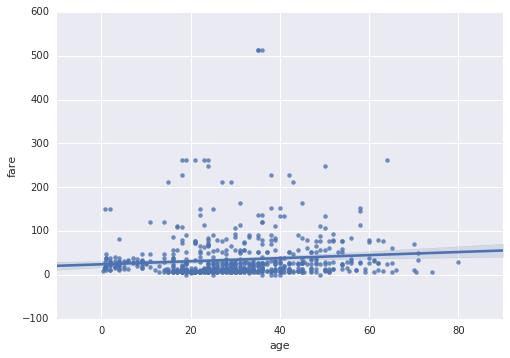

In [19]:
sns.regplot(x="age", y="fare", data=titanic)

### Linear Regression Equation

Seaborn is purely a visualization libray. Due to how it creates the graphs, there is no way to output the math behind the graph. 

In [40]:
from scipy.stats import linregress

# Fill in the NaN cells with medians
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

# Convert Panda series to a Python list
xvar = titanic.age.tolist()
yvar = titanic.fare.tolist()

linregress(xvar, yvar)

LinregressResult(slope=0.36903926178178864, intercept=21.368631241135944, rvalue=0.096688422180364955, pvalue=0.0038667538638708738, stderr=0.127411209015627)

SciPy does not do Robust Regression, but the same process would apply. You clean the data and would then use a library that supports the model you need.

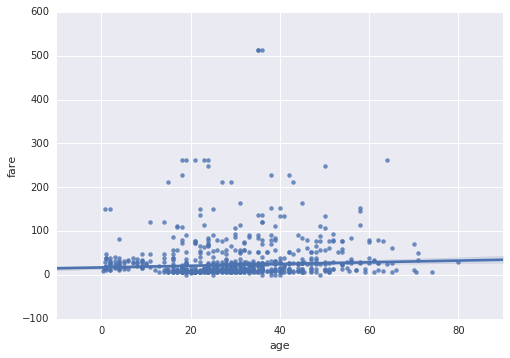

In [20]:
sns.regplot(x="age", y="fare", data=titanic, robust=True)

In [ ]:
sns.stripplot(x="who", y="fare", data=titanic)

Check out the dataset on [Kaggle](https://www.kaggle.com/c/titanic) for a machine learning tutorial with it.

# Examples of Visualizations

[Craigslist Missed Connections](http://www.vox.com/a/craigslist-missed-connections/i-analyzed-10-000-craigslist-missed-connections-here-s-what-i-learned)

[Who Marries Who](http://www.bloomberg.com/graphics/2016-who-marries-whom/)

[18th and 19th Century Ship Logs](https://i.imgur.com/dmaEsgO.png)